In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

## How late will my flight be?

(Data Source: Bureau of Transportation Statistics, 2008) 
A flight is only late if its late by 30 Minutes!

In [2]:
df = pd.read_csv("C:\\Users\\Chris\\Documents\\Python Scripts\\Thinkful File Examples\\AirlineDelays\\2008.csv")

In [3]:
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,5.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,3.0,17.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,926.0,930,1054.0,1100,WN,1746,...,3.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,3.0,10.0,0,NaN,0,2.0,0.0,0.0,0.0,32.0


In [4]:
# Clean Data

# Cancelled Flights - Not delayed.  Should drop from data - Over 130K entries
flights = df[df.Cancelled != 1]
flights = flights.drop(columns=['Cancelled', 'CancellationCode'])

# Diverted Flights - Delayed but its unclear if the flight eventually made it to the destination.  Decided to drop
flights = flights[flights.Diverted != 1]
flights = flights.drop(columns=['Diverted'])

# Not interested in TailNum - bye.
flights = flights.drop(columns='TailNum')

# Later analysis by airlines
flights = flights.drop(columns=['CarrierDelay','WeatherDelay', 'NASDelay','SecurityDelay','LateAircraftDelay'])

In [5]:
# Find NaN

null_count = flights.isnull().sum()
null_count[null_count>0]

Series([], dtype: int64)

In [6]:
# Create feature for 'Late Arrival'

# flights['TotalDelay'] = flights[['CarrierDelay','WeatherDelay', 'NASDelay','SecurityDelay','LateAircraftDelay']].sum(axis=1)
flights['LateArr'] = flights['ArrDelay'] < 30
flights['LateArr'] = pd.get_dummies(flights['LateArr'])

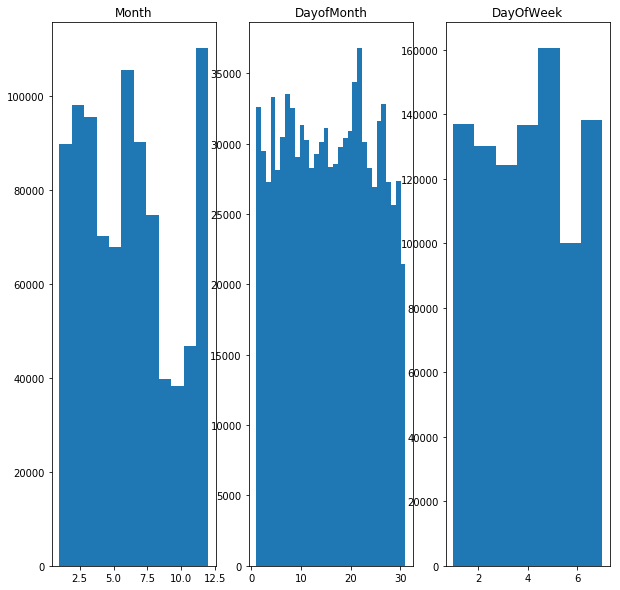

In [7]:
# Data Exploration - Does date effect late flights?

late_only = flights.loc[flights['LateArr']==1]

plt.figure(figsize=(10,10))

y=0
for x in late_only.columns[1:4]:
    y += 1
    plt.subplot(1,3,y)
    plt.title(x)
    plt.hist(late_only[x], late_only[x].max())
    
plt.show()

In [8]:
average = flights.LateArr.sum() / flights.LateArr.count()

# Percentage late by Month
print(pd.value_counts(late_only.Month) / pd.value_counts(flights.Month).sort_index() / average)

# Percentage late by DayofMonth
print(pd.value_counts(late_only.DayofMonth) / pd.value_counts(flights.DayofMonth).sort_index() / average)

#Percentage late by DayOfWeek
print(pd.value_counts(late_only.DayOfWeek) / pd.value_counts(flights.DayOfWeek).sort_index() / average)

1     1.131147
2     1.326957
3     1.179264
4     0.884973
5     0.837838
6     1.309953
7     1.083828
8     0.919480
9     0.555137
10    0.513419
11    0.668727
12    1.552480
Name: Month, dtype: float64
1     1.072398
2     0.959772
3     0.881822
4     1.112735
5     0.929637
6     1.016611
7     1.081818
8     1.075837
9     0.968568
10    1.021847
11    0.981187
12    0.941766
13    0.975280
14    0.973923
15    1.017575
16    0.933420
17    0.924157
18    0.962965
19    1.014254
20    1.011947
21    1.113907
22    1.212791
23    0.992492
24    0.922245
25    0.889092
26    1.055663
27    1.117269
28    0.892520
29    0.830700
30    0.970851
31    1.277258
Name: DayofMonth, dtype: float64
1    1.000183
2    0.956728
3    0.902710
4    0.998998
5    1.176203
6    0.880324
7    1.069305
Name: DayOfWeek, dtype: float64


In [9]:
# Flights in the winter months and early summer are more late on average.
months = [1,2,3,6,7,12]
flights['PeakMonth'] = ~flights['Month'].isin(months)
flights['PeakMonth'] = pd.get_dummies(flights['PeakMonth'])

In [10]:
days = [5,7]
flights['PeakDayOfWeek'] = False
flights['PeakDayOfWeek'] = ~flights['DayOfWeek'].isin(days)
flights['PeakDayOfWeek'] = pd.get_dummies(flights['PeakDayOfWeek'])

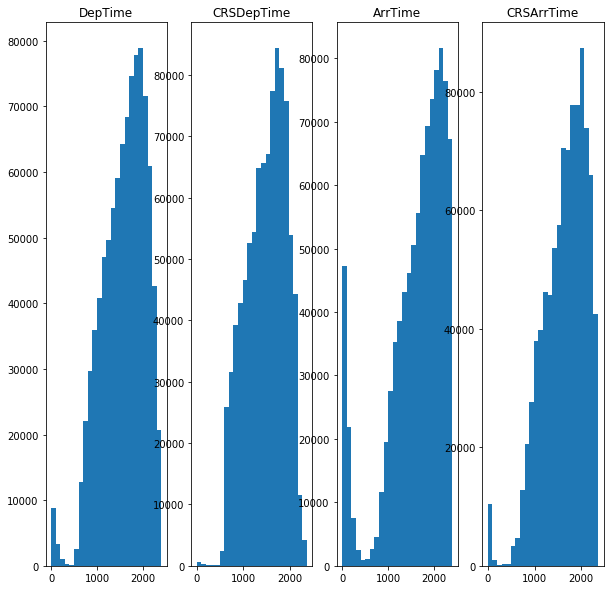

In [11]:
plt.figure(figsize=(10,10))

y=0
for x in late_only.columns[4:8]:
    y += 1
    plt.subplot(1,4,y)
    plt.title(x)
    plt.hist(late_only[x], 24)
    
plt.show()

In [12]:
for x in range(0, 2400, 100):
    tot = (flights['DepTime'] > x) & (flights['DepTime'] <= (x+100))
    tot_late = (late_only['DepTime'] > x) & (late_only['DepTime'] <= (x+100))
    avg = tot_late.sum() / tot.sum()
    print('Hour: ' + str(x) + ' ' + str(tot.sum()) + ' ' + str(tot_late.sum()) + ' ' + str(avg))

Hour: 0 19981 8766 0.4387167809418948
Hour: 100 5681 3370 0.5932054215807077
Hour: 200 1780 969 0.5443820224719101
Hour: 300 842 323 0.3836104513064133
Hour: 400 3758 164 0.043640234167110166
Hour: 500 163796 2526 0.015421622017631689
Hour: 600 444295 12805 0.02882094104142518
Hour: 700 430556 22045 0.05120123746969035
Hour: 800 449179 29657 0.06602490321230511
Hour: 900 433156 35861 0.0827900340754832
Hour: 1000 430572 40735 0.09460670921471903
Hour: 1100 442644 47046 0.1062840567137474
Hour: 1200 423216 49674 0.11737268912328457
Hour: 1300 432891 54580 0.1260825473387065
Hour: 1400 418176 59126 0.1413902280379553
Hour: 1500 408720 64322 0.15737424153454688
Hour: 1600 434562 68325 0.1572272771204109
Hour: 1700 429593 74629 0.17372024218271712
Hour: 1800 399515 77869 0.19490882695268014
Hour: 1900 384803 78878 0.20498280938558172
Hour: 2000 283859 71606 0.2522590441028821
Hour: 2100 251084 60864 0.24240493221392045
Hour: 2200 117334 42650 0.3634922528849268
Hour: 2300 45036 20625 0.457

In [13]:
flights['PeakTime'] = ~(flights['DepTime'] < 400) ^ (flights['DepTime'] >= 1759)
flights['PeakTime'] = pd.get_dummies(flights['PeakTime'])

In [14]:
# Ridge Regression model to predict how delayed the flights will be in minutes

from sklearn import linear_model
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import time

In [22]:
# Only using a sample of 100,000 flights
sample = flights.sample(n=100000, random_state=369)

X = sample.drop(columns=['ArrDelay','UniqueCarrier','FlightNum','Origin','Dest','DepDelay','LateArr'])
y = sample.ArrDelay

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=111)

In [23]:
X.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'ActualElapsedTime', 'CRSElapsedTime',
       'AirTime', 'Distance', 'TaxiIn', 'TaxiOut', 'PeakMonth',
       'PeakDayOfWeek', 'PeakTime'],
      dtype='object')

In [24]:
import winsound
start_time = time.time()

# model here
ridgeregr = linear_model.Ridge()
ridgeregr.fit(X_train, y_train)
print(ridgeregr.score(X_train, y_train))
print(ridgeregr.score(X_test, y_test))

for x in range(0,3):
    winsound.Beep(1500,150)
print("--- %s seconds ---" % (time.time() - start_time))


0.2804225377907149
0.29730505460019796
--- 0.5552690029144287 seconds ---


In [25]:
cross_val_score(ridgeregr, X, y, cv=5)

array([0.27635111, 0.28170139, 0.29238057, 0.29004712, 0.28673935])

In [28]:
ridgeregr.predict(X)[2]

-10.688118146690764

In [20]:
y.head()

6200911    -3.0
3700927    86.0
2167383    -8.0
1156128     2.0
1470548    -9.0
Name: ArrDelay, dtype: float64

In [21]:
X.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,ActualElapsedTime,CRSElapsedTime,AirTime,DepDelay,Distance,TaxiIn,TaxiOut,PeakMonth,PeakDayOfWeek,PeakTime
6200911,2008,11,2,7,941.0,940,1037.0,1040,56.0,60.0,43.0,1.0,248,4.0,9.0,0,1,0
3700927,2008,7,31,4,2314.0,2135,21.0,2255,67.0,80.0,57.0,99.0,417,3.0,7.0,1,0,1
2167383,2008,4,19,6,822.0,820,932.0,940,70.0,80.0,59.0,2.0,342,4.0,7.0,0,0,0
1156128,2008,2,25,1,845.0,845,947.0,945,62.0,60.0,38.0,0.0,191,3.0,21.0,1,0,0
1470548,2008,3,26,3,1346.0,1348,1616.0,1625,90.0,97.0,73.0,-2.0,507,4.0,13.0,1,0,0
